## Seaborn

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ヒストグラム： sns.distplot()

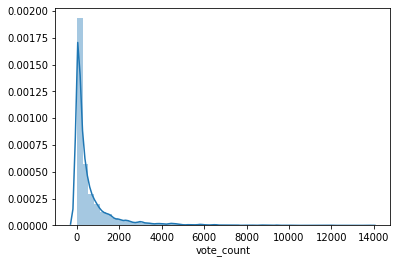

In [29]:
df = pd.read_csv('tmdb_5000_movies.csv')
sns.distplot(df['vote_count'])

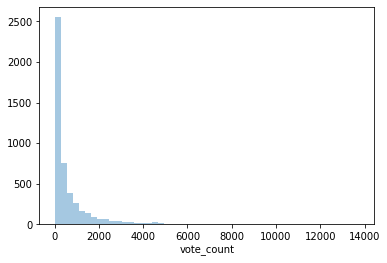

In [30]:
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

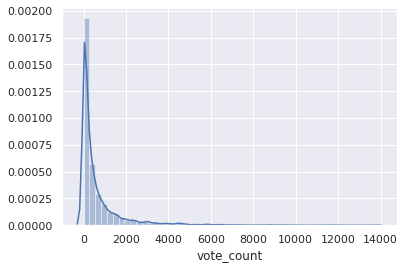

In [31]:
sns.set()
sns.distplot(df['vote_count'])

### 散布図

#### sns.jointplot()

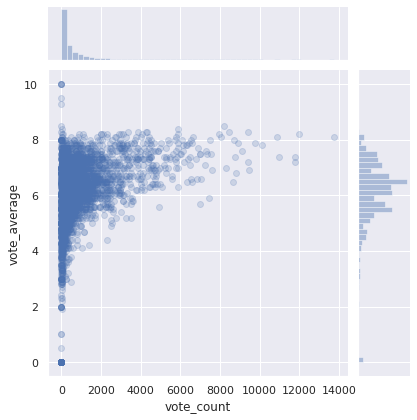

In [11]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

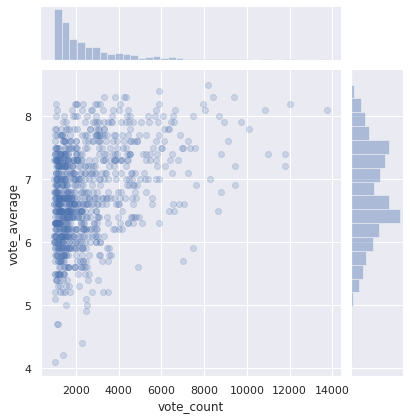

In [32]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[df['vote_count'] >= 1000]
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

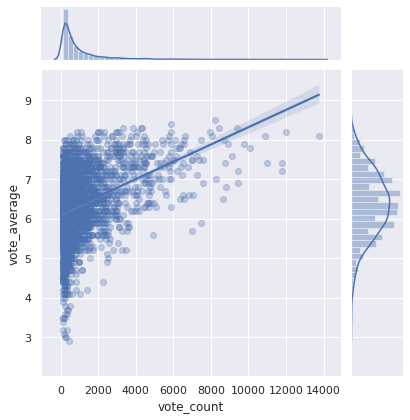

In [33]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
# alpha だけではエラー
# sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': {'alpha': 0.3}})
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.3)})

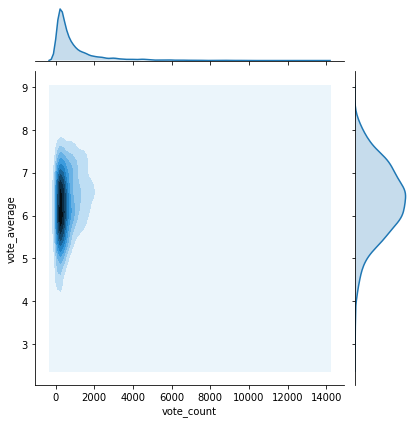

In [11]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

#### sns.pairplot()

In [17]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

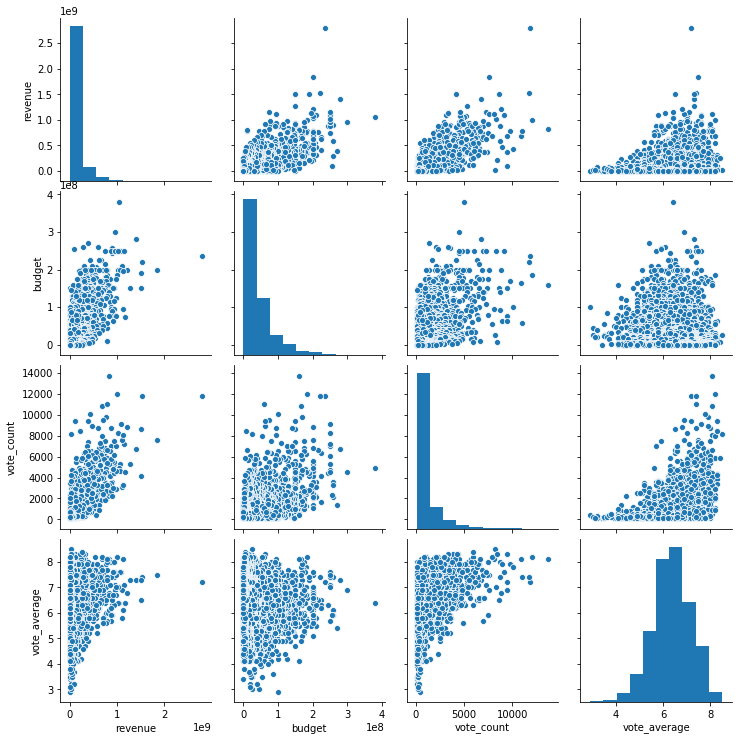

In [20]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

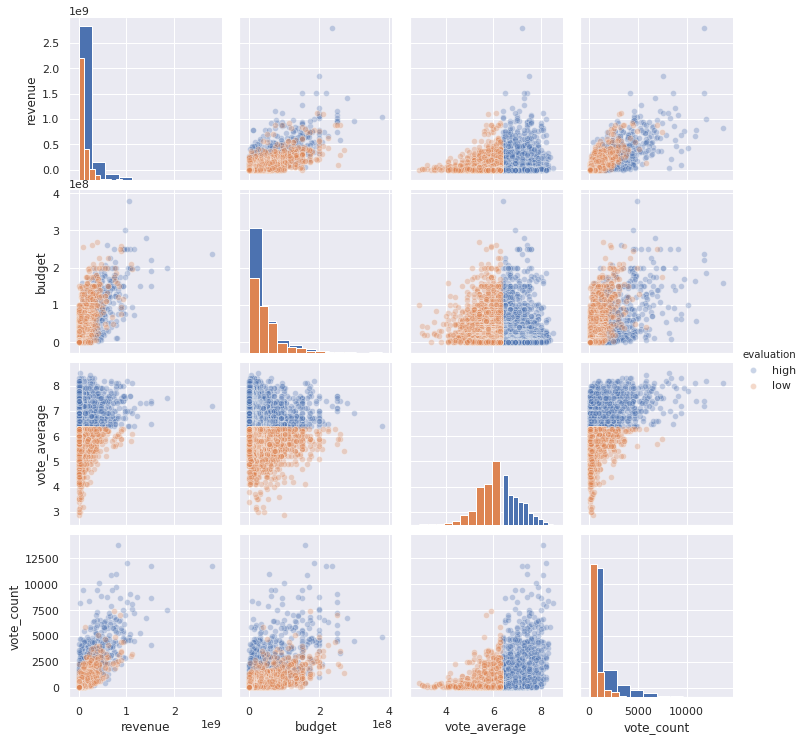

In [34]:
# vote_averageが下位50%だったらlow、上位50%だったらhigh
#low = df[df['vote_average'] < df['vote_average'].mean()]
#high = df[df['vote_average'] >= df['vote_average'].mean()]
df_vote_average_mean = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'low' if x < df_vote_average_mean else 'high')
sns.pairplot(df[['revenue', 'budget', 'vote_average', 'vote_count', 'evaluation']],
             hue='evaluation',
             plot_kws={'alpha':0.3},
             diag_kind='hist')

## Categorical Plot

### sns.barplot()

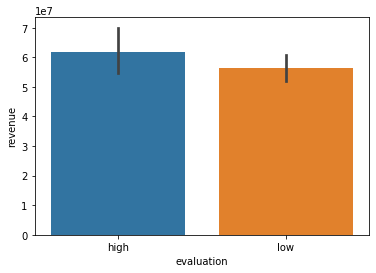

In [8]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

### sns.countplot()

In [35]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

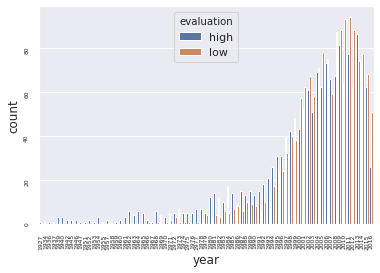

In [36]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

In [5]:
# 年代カラム（decade）2012->2010s
df['decade'] = df['year'].apply(lambda x: x[:3] + '0s')

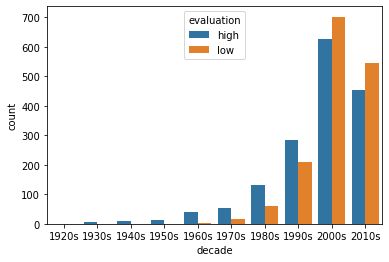

In [31]:
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

### sns.boxplot()

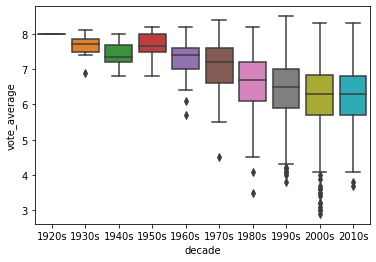

In [34]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.violinplot()

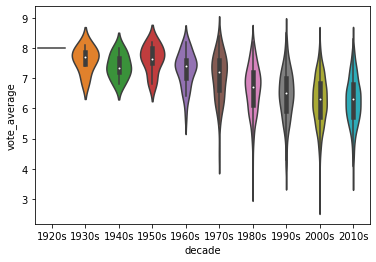

In [35]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.swarmplot()

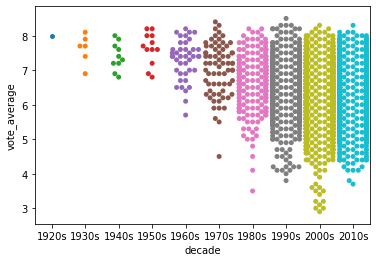

In [37]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

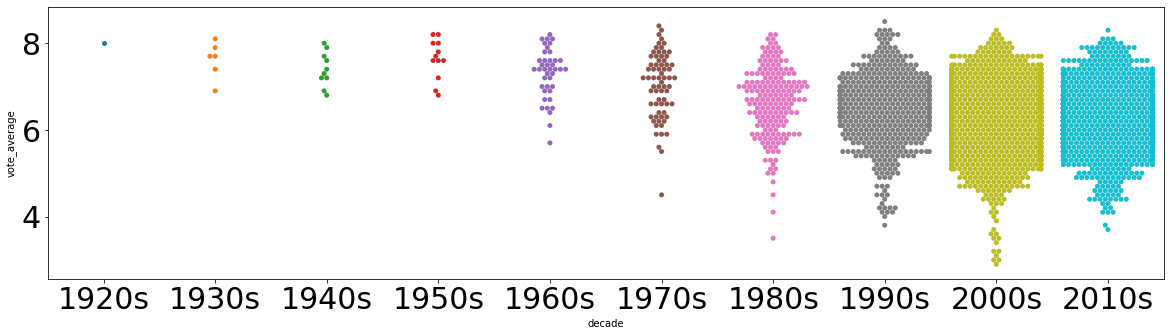

In [39]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

### Heatmap

### .corr()

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]

In [53]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


In [44]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


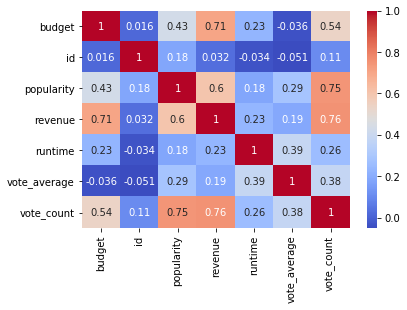

In [61]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [3]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')

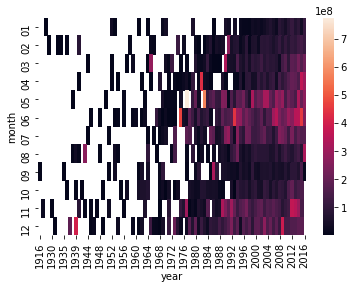

In [8]:
sns.heatmap(revenue_df)

## SeabornのStyleや付属情報

### sns.set()

・　contex引数
・　style1引数
・　palette引数

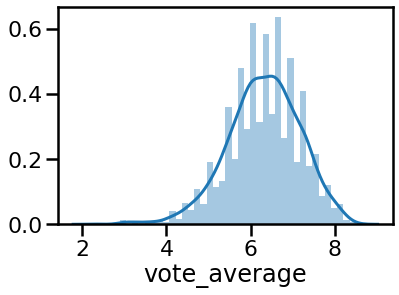

In [9]:
# context: 'paper', 'notebook', 'talk', 'poster'
# sns.set(context='talk')
sns.set_context('poster')
sns.distplot(df['vote_average'])

In [16]:
# style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set(context='paper', style='ticks')
# sns.distplot(df['vote_average'])
# sns.despine()

In [5]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

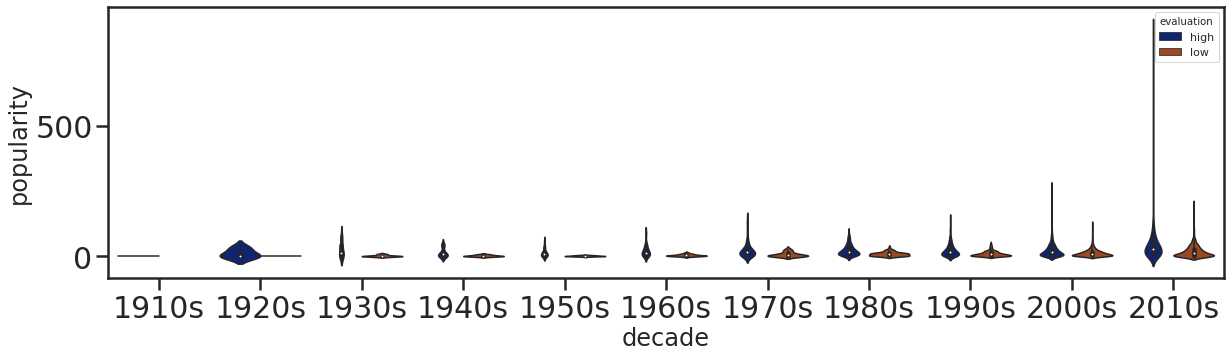

In [61]:
# palette: URL参照 deep, muted, bright, pastel, dark, colorlind
df = pd.read_csv('tmdb_5000_movies.csv')
# df = df[~(pd.isna(df['release_date']))]
df = df[~df['release_date'].isna()]
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low' )

fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
sns.set(context='notebook', style='ticks', palette='dark')
sns.violinplot(ax=ax, x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation')

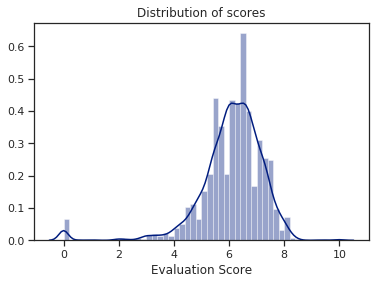

In [64]:
sns.distplot(df['vote_average'])
plt.title('Distribution of scores')
plt.xlabel('Evaluation Score')
plt.savefig('saves_seaborn.png')

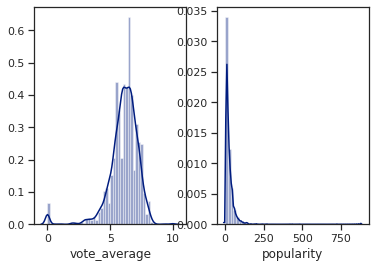

In [68]:
fig, axes = plt.subplots(1, 2)
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['popularity'], ax=axes[1])